# Assignment #1 - Source Distribution on an Airfoil

Initial Questions:

1) The point of maximum pressure will be right at the tip of the leading edge

2) This point is called the stagnation point

3) Yes, the airfoil will generate lift

In [3]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [4]:
N = 51                           # Number of points in each direction
x_start, x_end = -1.0, 2.0       # x-boundaries
y_start, y_end = -0.5, 0.5       # y-boundaries
x = numpy.linspace(x_start, x_end, N) # 1D array for x
y = numpy.linspace(y_start, y_end, N) # 1D array for y
X, Y = numpy.meshgrid(x, y)           # creates a meshgrid

In [5]:
u_inf = 1.0    # freestream velocity

# freestream velocity field
u_freestream = u_inf * numpy.ones((N,N), dtype=float)
v_freestream = numpy.zeros((N,N), dtype=float)

# stream function with 0 angle of attack
psi_freestream = u_inf * Y

In [6]:
x_source, y_source = numpy.loadtxt('NACA0012_x.txt'), numpy.loadtxt('NACA0012_y.txt')   # source locations

sigma = numpy.loadtxt('NACA0012_sigma.txt');  #source strengths

In [7]:
# Function for velocity computation
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by the sources
    
    Parameters
    ----------
    strength: float
        Strength of the sources
    xs: float
        x-coordinates of the sources
    ys: float
        y-coordinates of the sources
    X: 2D Numpy array of floats
        x-coordinates of the mesh points
    Y: 2D Numpy array of floats
        y-coordinates of the mesh points
        
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field
    v: 2D Numpy array of floats
        y-component of the velocty vector field
    """
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [10]:
# Define function to compute stream function of sources
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream function generated by the sources
    
    Parameters
    ----------
    strength: float
        Strength of the sources
    xs: float
        x-coordinates of the sources
    ys: float
        y-coordinates of the sources
    X: 2D Numpy array of floats
        x-coordinates of the mesh points
    Y: 2D Numpy array of floats
        y-coordinates of the mesh points
        
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream function
    """
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [17]:
u_total = numpy.zeros(numpy.shape(X))
v_total = numpy.zeros(numpy.shape(X))
psi_total = numpy.zeros(numpy.shape(X))

for i in range(len(x_source)):
    u, v = get_velocity(sigma[i], x_source[i], y_source[i], X, Y)
    psi = get_stream_function(sigma[i], x_source[i], y_source[i], X, Y)
    u_total = u + u_total
    v_total = v + v_total
    psi_total = psi + psi_total

In [18]:
# superposition of source on the freestream
U = u_freestream + u_total
V = v_freestream + v_total
Psi = psi_freestream + psi_total

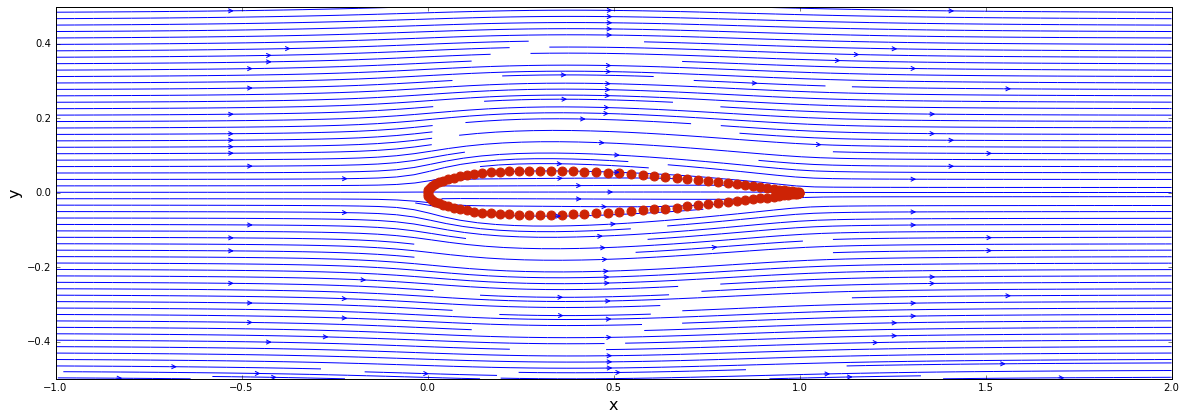

In [28]:
# plot the streamlines
size = 20
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize = 16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, U, V, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

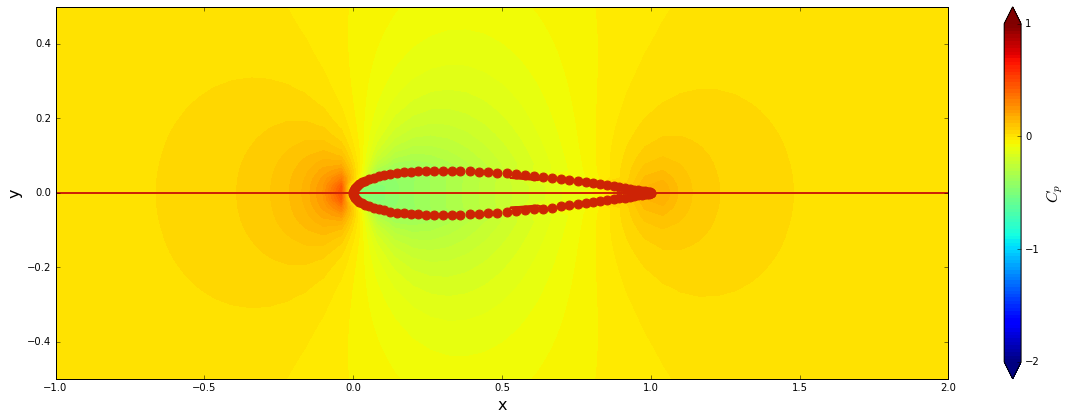

In [45]:
# Compute the pressure coefficient field
cp = 1.0 - (U**2+V**2)/u_inf**2

# plot the pressure coefficient field
size = 20
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0, 1.0, 2.0])
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, Psi, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid')

In [38]:
numpy.argmax(cp)

1291

In [41]:
numpy.where(cp==1291)

(array([], dtype=int64), array([], dtype=int64))

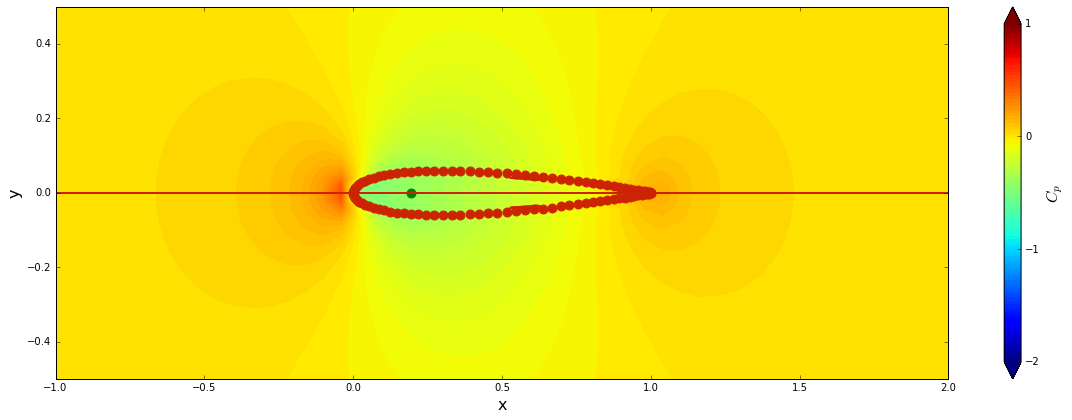

In [51]:
size = 20
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0, 1.0, 2.0])
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, Psi, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid')

x_stag = 
y_stag = 

pyplot.scatter(x_stag, y_stag, color='g', s=80, marker='o')